<a href="https://colab.research.google.com/github/anhhaibkhn/LeetCode_Daily_Challenges/blob/master/JuneLeetCodePart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

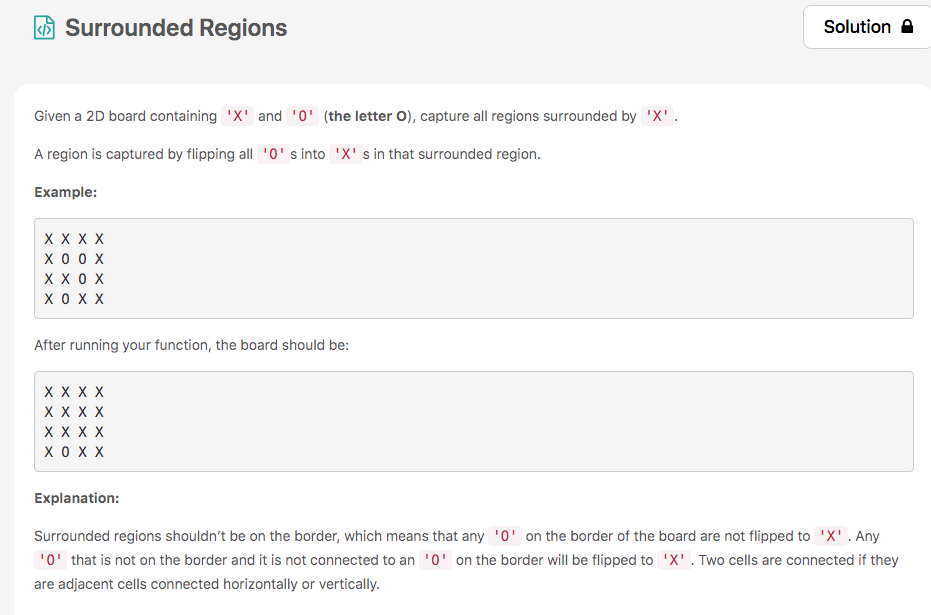

In [ ]:
'''June 17, 
same as counting island, using DFS
'''
class Solution:
    def solve(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        if not board or not board[0]:
            return 
        lenx,leny = len(board[0]), len(board)
        
        # Stack of cells to be checked 
        Expand = []
        
        # Put all the edge celss to the Stack
        for y in range(leny):
            Expand += [(y,0), (y,lenx -1)]
        for x in range(1,lenx -1):
            Expand += [(0,x), (leny -1,x)]
        
        # If cell contains 'O' temporary change it to 't' and add neighbours to stack
        while Expand:
            y, x = Expand.pop()
            # check limit out of bound values or 'X' will be ignored here. 
            if 0 <= y < leny and 0 <= x < lenx and board[y][x] == 'O': 
                board[y][x] = 'T'
                for dy, dx in [(1,0),(0,1),(-1,0),(0,-1)]:
                    Expand.append((y + dy,x + dx)) # these can go out of bound 
         # Change all the 'T' back to 'O' and all the 'O' to 'X'         
        for y in range(leny):
            for x in range(lenx):
                if board[y][x] == 'O':
                    board[y][x] = 'X'
                elif board[y][x] == 'T':
                    board[y][x] = 'O'


'''Using DFS '''

class Solution:
    def solve(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        if not board:
            return None
        m, n = len(board), len(board[0])

        # Use DFS to all the edges that contain 'O'
        for i in range(m):
            if board[i][0] == "O":
                self.dfs(i,0,board)
            if board[i][n-1] == "O":
                self.dfs(i,n-1,board)
        for j in range(n):
            if board[0][j] == "O":
                self.dfs(0,j,board)
            if board[m-1][j] == "O":
                self.dfs(m-1,j,board)
        
        # After finished changing all 'O' at the edges to 'N'
        for i in range(m):
            for j in range(n):
                if board[i][j] != "N":
                    board[i][j] = "X" # The rest elements to 'X'
                else:
                    board[i][j] = "O" # change 'N' to 'O'
    
    
    def dfs(self, i, j, board):
        m, n = len(board), len(board[0])
        if 0 <= i < m and 0 <= j < n and board[i][j] == "O":
            # to temporary change 'O' at the edges to 'N'
            board[i][j] = "N"  
            self.dfs(i+1,j,board)
            self.dfs(i-1,j,board)
            self.dfs(i,j+1,board)
            self.dfs(i,j-1,board)

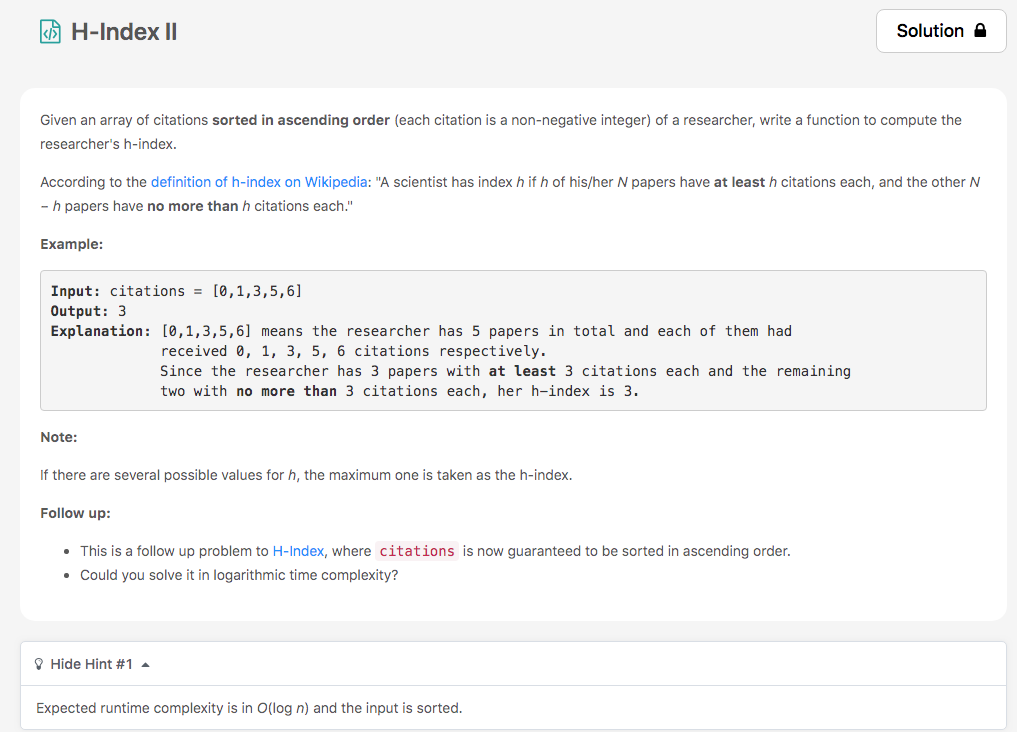

In [ ]:
''' June 17
H-Index II
Given an array of citations sorted in ascending order (each citation is a non-negative integer) of a researcher, write a function to compute the researcher's h-index.

According to the definition of h-index on Wikipedia: "A scientist has index h if h of his/her N papers have at least h citations each, and the other N − h papers have no more than h citations each."
'''
# Example:

# Input: citations = [0,1,3,5,6]
# Output: 3 
# Explanation: [0,1,3,5,6] means the researcher has 5 papers in total and each of them had 
#              received 0, 1, 3, 5, 6 citations respectively. 
#              Since the researcher has 3 papers with at least 3 citations each and the remaining 
#              two with no more than 3 citations each, her h-index is 3.

''' Note:
If there are several possible values for h, the maximum one is taken as the h-index.
'''

# bruteforce : time limit exceed
class Solution:
    def hIndex(self, citations: List[int]) -> int:
        if citations:
            for h in range(len(citations),0,-1):
                count = sum(map(lambda x : x>=h, citations))
                if count >= h:
                    return h
        return 0   

# Tracking it while iterate 

class Solution:
    def hIndex(self, citations: List[int]) -> int:
        if citations:
            ci_len = len(citations)
            for i in range(ci_len,0,-1):
                if citations[ci_len - i] >= i:
                    return i
         
        return 0   


# Fastest 128 ms using binary search

class Solution:
    def hIndex(self, citations: List[int]) -> int:
        if not citations:
            return 0
        
        left = 0
        right = len(citations)-1
        
        while left < right:
            mid = left + (right-left)//2
            
            if citations[mid] < len(citations) - mid:
                left = mid + 1
            else:
                right = mid
        
        return len(citations) - right if citations[right] >= (len(citations) - right) else 0

# 135 ms using binary search 

class Solution:
    def hIndex(self, citations: List[int]) -> int:
        n = len(citations)
        l, r = 0, n
        while l < r:
            idx = (l + r)//2
            if n - idx - 1 < citations[idx]:
                r = idx
            else:
                l = idx + 1
        return n - l